### ssp.csr_matrix

In [4]:
import scipy.sparse as ssp
from torch import tensor
import numpy as np
edge_index = tensor([[0, 2, 2, 1], [1, 0, 1, 2]]).t() # location in matrix A
edge_weight = [1,1,1,1] # values in matrix A
A = ssp.csr_matrix((edge_weight, (edge_index[:, 0], edge_index[:, 1])),
                                shape=(3, 3), dtype=float)
print(A)
print(type(A))
a = A.toarray()
print(a)

  (0, 1)	2.0
  (1, 2)	1.0
  (2, 0)	2.0
  (2, 1)	1.0
<class 'scipy.sparse._csr.csr_matrix'>
[[0. 2. 0.]
 [0. 0. 1.]
 [2. 1. 0.]]


In [6]:
src = 2
dst = 1
print(A[src].toarray())
print()
print(A[dst].toarray())

[[2. 1. 0.]]

[[0. 0. 1.]]


In [10]:
ss = A[src].multiply(A[dst])
print(type(ss)) # empty ss means the result only has sparse space, no values

<class 'scipy.sparse._csr.csr_matrix'>


In [32]:
np.sum(A[src].multiply(A[dst]), 1)

matrix([[0.]])

In [89]:
multiplier = 1 / np.log(A.sum(axis=0)) # 1/(log(N(u))) for each node
multiplier[np.isinf(multiplier)] = 0
print(multiplier)

[[0.         1.44269504 0.        ]]


/tmp/ipykernel_10200/3309294230.py:1: RuntimeWarning: divide by zero encountered in divide
  multiplier = 1 / np.log(A.sum(axis=0))


In [75]:
print(f'A:')
print(A)
print(A.toarray())

print(f'A_:')
A_ = A.multiply(multiplier).tocsr() # element-wise multiplication
print(A_)
print(A_.toarray())


A:
  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (2, 1)	1.0
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 1. 0.]]
A_:
  (0, 1)	1.4426950408889634
  (1, 2)	0.0
  (2, 0)	0.0
  (2, 1)	1.4426950408889634
[[0.         1.44269504 0.        ]
 [0.         0.         0.        ]
 [0.         1.44269504 0.        ]]


In [102]:
src = 2
dst = 1
print(A[src].toarray())
print()
print(A_[dst].toarray())
print()
print(A[src].multiply(A_[dst]).toarray())
print(A[src].multiply(A_[src]).toarray())

cur_scores = np.array(np.sum(A[src].multiply(A_[src]), 1))
print((cur_scores))

[[1. 1. 0.]]

[[0. 0. 0.]]

[[0. 0. 0.]]
[[0.         1.44269504 0.        ]]
[[1.44269504]]


### Draw graph

In [3]:
import os
import yaml
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def get_graph_structure(config_yaml:str,show_edges:bool=False):
    """
    get structure of graph
    """
    config_yaml = os.path.join('graph_configs',config_yaml)
    with open(config_yaml, "r") as file:
        load_config = yaml.safe_load(file)
    edges = np.array(load_config['edge_index']).T
    del load_config
    if show_edges:
        print(f'edges: {edges}')
    return edges

def draw_graph(graph_yaml:str,nodes_pos:dict=None):
    """
    Function:
        Draw corresponding graph
    Param:
        graph_yaml: name of .yaml file of current graph
        nodes_pos: dict containing positions of nodes
    """
    # get config of edges of graph
    edges = get_graph_structure(graph_yaml)

    # make sure edges is np.array with shape [n,2], where:
    #   n: number of nodes
    #   2: src node -> dst node
    G = nx.DiGraph()
    G.add_edges_from(edges)

    # configuration of showing graph
    options = {
        "font_size": 20, # font size of writing in nodes
        "node_size": 1500, # size of node
        "node_color": "limegreen", # color of background of node
        "edgecolors": "black", # color of egde of node
        "edge_color": "black", # color of egde connecting nodes
        "arrowsize": 20, # size of arrow
        "arrowstyle": '-|>', # style and direction of arrow
        "linewidths": 3, # linewidth of edge of node
        "width": 2, # linewidth of edge
    }

    # positions of nodes
    # if no specific node positions are defined, it will be distributed randomly
    if nodes_pos is None:
        pos = nx.spring_layout(G)
    else:
        pos = nodes_pos

    # draw graph
    nx.draw_networkx(G, pos, **options)
    ax = plt.gca()
    ax.set_title('{}'.format(graph_yaml.split('_')[0]), fontsize=15)
    ax.margins(0.20)
    plt.axis("off")
    plt.show()

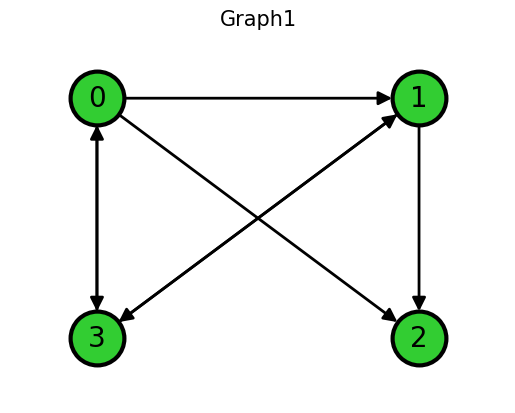

In [4]:
graph1_yaml = 'Graph1_AA.yaml'
nodes_pos_1 = {0: (-0.5, 0.5), 1: (0.5, 0.5), 2: (0.5, -0.5), 3: (-0.5, -0.5)}
G = draw_graph(graph1_yaml, nodes_pos_1)

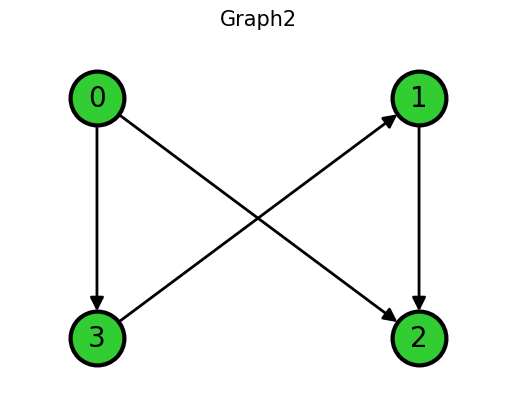

In [5]:
graph2_yaml = 'Graph2_AA.yaml'
nodes_pos_2 = {0: (-0.5, 0.5), 1: (0.5, 0.5), 2: (0.5, -0.5), 3: (-0.5, -0.5)}
draw_graph(graph2_yaml,nodes_pos_2)

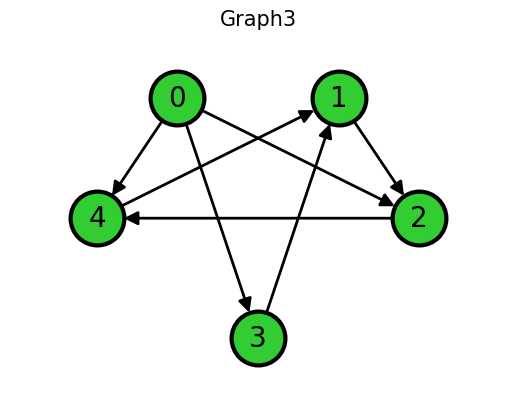

In [6]:
graph3_yaml = 'Graph3_AA.yaml'
nodes_pos_3 = {0: (-0.3, 0.5), 1: (0.3, 0.5), 2: (0.6, 0), 3: (0, -0.5), 4: (-0.6, 0)}
draw_graph(graph3_yaml,nodes_pos_3)

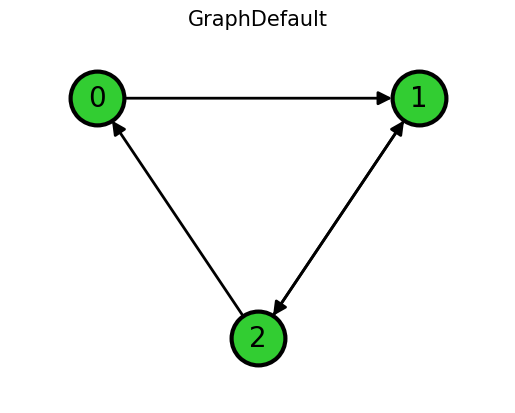

In [7]:
graph_default_yaml = 'GraphDefault_AA.yaml'
nodes_pos_default = {0: (-0.3, 0.5), 1: (0.3, 0.5), 2: (0, -0.5)}
draw_graph(graph_default_yaml, nodes_pos_default)

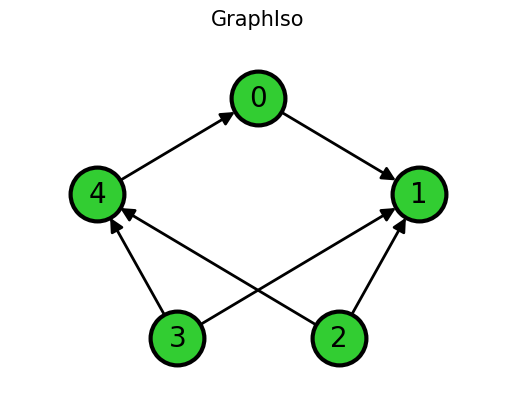

In [8]:
graph_iso_yaml = 'GraphIso_AA.yaml'
nodes_pos_iso = {0: (0, 0.5), 1: (0.6, 0.1), 2: (0.3, -0.5), 3: (-0.3, -0.5), 4: (-0.6, 0.1)}
draw_graph(graph_iso_yaml,nodes_pos_iso)